In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler , OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error,  mean_absolute_error
from sklearn.linear_model import  LinearRegression
from sklearn.ensemble import RandomForestRegressor
# imported the necessary libraries for data manipulation, preprocessing, model training and evaluation.

In [22]:
# LOADING THE DATASET using pandas 
df = pd.read_csv('SuperMarket Analysis.csv')
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.shape

(1000, 17)

for this we can see that we have 1000 row and 17 columns from this data

In [ ]:
df.describe()
# provides a statistical summary of the dataset, including count, mean, standard deviation, minimum and maximum values for each numerical column.

,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [26]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

we can see that they is no missing values in this dataset so we are free to go to the next step 


In [ ]:
df = df.drop(columns=[
    "Invoice ID",
    "Tax 5%",
    "gross income",
    "gross margin percentage",
    "cogs"
])
# we drop the columns we don't need for training 

In [31]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Sales,Date,Time,Payment,Rating
0,Alex,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,1/5/2019,1:08:00 PM,Ewallet,9.1
1,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,3/8/2019,10:29:00 AM,Cash,9.6
2,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,340.5255,3/3/2019,1:23:00 PM,Credit card,7.4
3,Alex,Yangon,Member,Female,Health and beauty,58.22,8,489.0480,1/27/2019,8:33:00 PM,Ewallet,8.4
4,Alex,Yangon,Member,Female,Sports and travel,86.31,7,634.3785,2/8/2019,10:37:00 AM,Ewallet,5.3


In [ ]:
# Feature engineering 
# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract useful features
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month

# Convert Time to hour
df['Hour'] = pd.to_datetime(df['Time']).dt.hour

# Drop original Date and Time
df = df.drop(columns=["Date", "Time"])
# 

C:\Users\HP ProBook 440 G7\AppData\Local\Temp\ipykernel_11272\1447019070.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


In [35]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Sales,Payment,Rating,Day,Month,Hour
0,Alex,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,Ewallet,9.1,5,1,13
1,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,Cash,9.6,8,3,10
2,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,340.5255,Credit card,7.4,3,3,13
3,Alex,Yangon,Member,Female,Health and beauty,58.22,8,489.0480,Ewallet,8.4,27,1,20
4,Alex,Yangon,Member,Female,Sports and travel,86.31,7,634.3785,Ewallet,5.3,8,2,10


### Exploratory Data analysis 

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
# imported the needed liberies for visualisation  

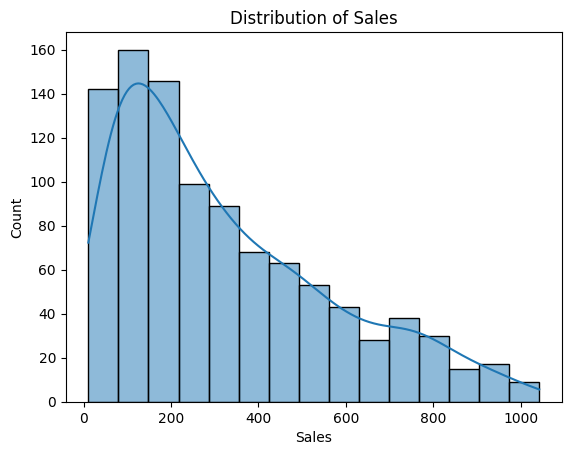

In [ ]:
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()

Distribution is right-skewed, showing high volume in the 100-200 range with a long tail toward 1000.

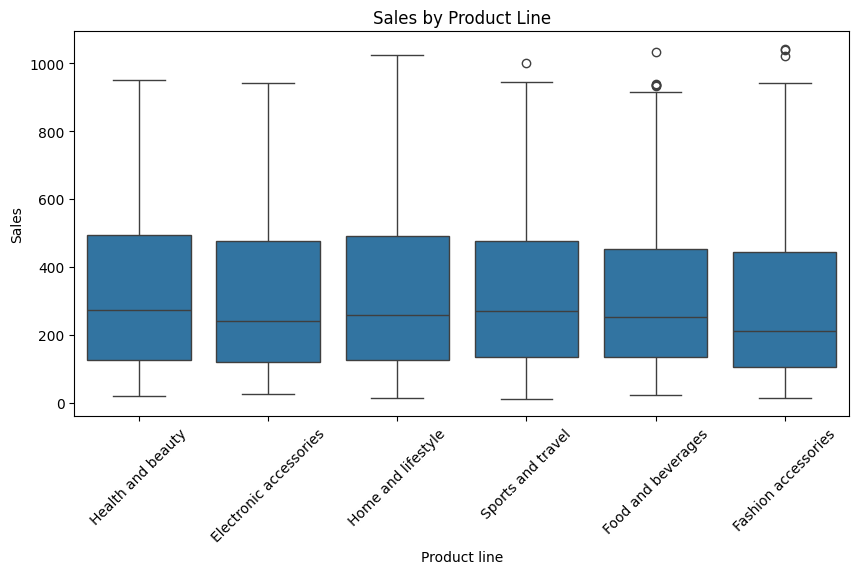

In [40]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Product line", y="Sales", data=df)
plt.xticks(rotation=45)
plt.title("Sales by Product Line")
plt.show()

Sales distribution is uniform across all categories, with the middle 50% of transactions falling predictably between 150 and 500. We are seeing healthy 'bonus' high value sales (outliers) in three out of six categories, maintaining a strong overall sales ceiling

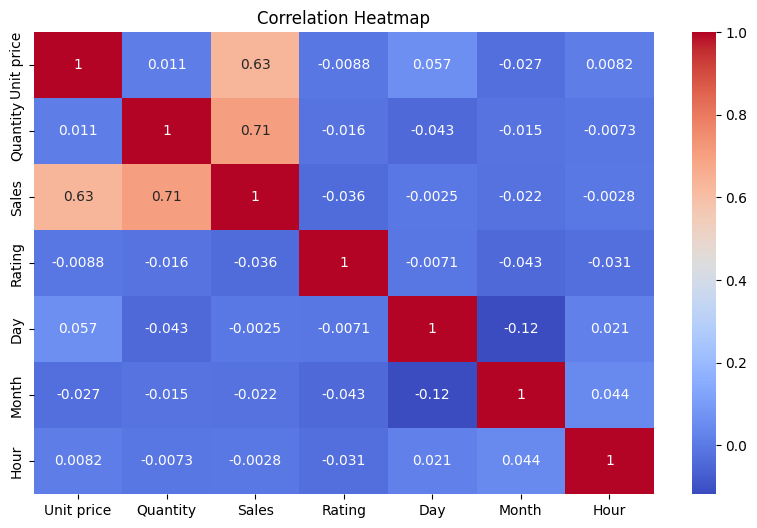

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Data confirms a strong positive relationship between transaction size (Quantity/Price) and total Sales. External factors such as time of day and product ratings show no statistical impact on revenue, pointing toward a highly consistent and price-resilient buying pattern across the dataset

In [ ]:
df = pd.get_dummies(df, drop_first=True)
# we convert all this columns Branch, City, Customer type, Gender, Payment, Product line to numerical values using one hot encoding

In [52]:
df.head()

,Unit price,Quantity,Sales,Rating,Day,Month,Hour,Branch_Cairo,Branch_Giza,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,74.69,7,548.9715,9.1,5,1,13,False,False,False,True,False,False,False,False,True,False,False,False,True
1,15.28,5,80.2200,9.6,8,3,10,False,True,True,False,True,False,False,False,False,False,False,False,False
2,46.33,7,340.5255,7.4,3,3,13,False,False,False,True,True,False,False,False,False,True,False,True,False
3,58.22,8,489.0480,8.4,27,1,20,False,False,False,True,False,False,False,False,True,False,False,False,True
4,86.31,7,634.3785,5.3,8,2,10,False,False,False,True,False,False,False,False,False,False,True,False,True


In [53]:
# Here we split the data into features and target variable
x = df.drop(columns=["Sales"], axis=1) # we drop the target variable (Sales) from the features variable
y = df["Sales"] # we assign the target variable (Sales) to y

In [54]:
x.head()

,Unit price,Quantity,Rating,Day,Month,Hour,Branch_Cairo,Branch_Giza,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,74.69,7,9.1,5,1,13,False,False,False,True,False,False,False,False,True,False,False,False,True
1,15.28,5,9.6,8,3,10,False,True,True,False,True,False,False,False,False,False,False,False,False
2,46.33,7,7.4,3,3,13,False,False,False,True,True,False,False,False,False,True,False,True,False
3,58.22,8,8.4,27,1,20,False,False,False,True,False,False,False,False,True,False,False,False,True
4,86.31,7,5.3,8,2,10,False,False,False,True,False,False,False,False,False,False,True,False,True


In [55]:
y.head()

0    548.9715
1     80.2200
2    340.5255
3    489.0480
4    634.3785
Name: Sales, dtype: float64